In [1]:
#load packages
import pandas as pd
import numpy as np

In [2]:
#load data visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Text cleaning
import neattext.functions as nfx

In [4]:
pip install neattext

Note: you may need to restart the kernel to use updated packages.


In [6]:
df=pd.read_csv("emotion_dataset.csv")

# Data Exploration

In [6]:
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [7]:
#shape--
df.shape

(34792, 2)

In [18]:
#datatypes
df.dtypes

Emotion    object
Text       object
dtype: object

In [19]:
# check for missing values
df.isnull().sum()

Emotion    0
Text       0
dtype: int64

In [20]:
#value counts
df['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

<AxesSubplot:>

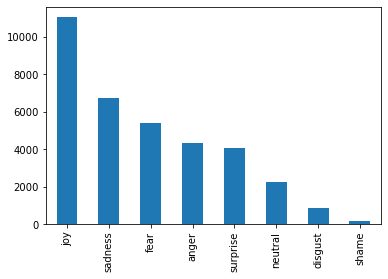

In [23]:
#value counts of emotion
df['Emotion'].value_counts().plot(kind='bar')

C:\ProgramData\Anaconda3\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Emotion', ylabel='count'>

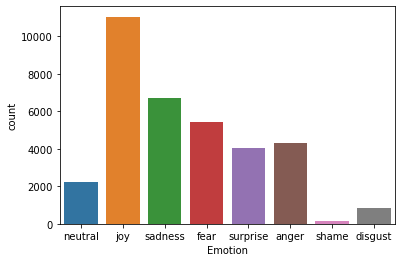

In [24]:
#using seabon to plot
#old method
sns.countplot(df['Emotion'])

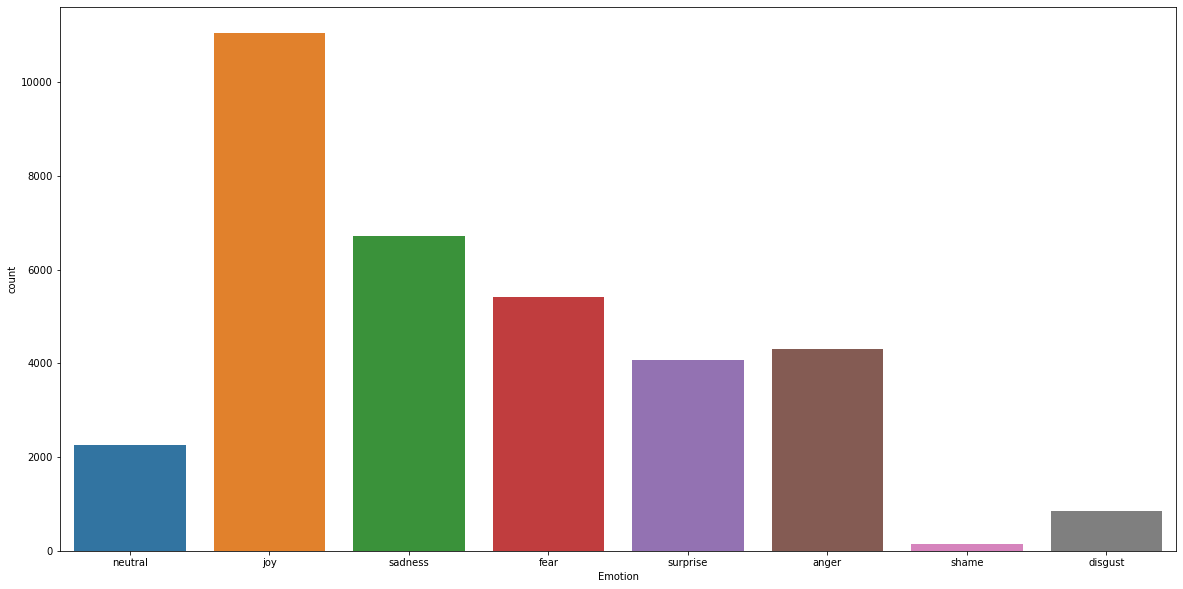

In [25]:
plt.figure(figsize=(20,10))
sns.countplot(x='Emotion',data=df)
plt.show()

# Exploration
+ Getting dentimen from each line 
+ Text cleaning
+ Sentiment Analysis
+ Keyword exctraction
      - Keywords for ech emotion
      - Wordcloud

In [26]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [27]:
from textblob import TextBlob

In [28]:
#write the function for finding the sentiment
def get_Sentiment(text):
    blob=TextBlob(text)
    sentiment=blob.sentiment.polarity
    if sentiment>0:
        result="positive"
    elif sentiment<0:
        result="negative"
    else:
        result="neutral"
    return result

In [29]:
#chec
get_Sentiment("I coding")

'neutral'

In [30]:
#lets apply this function to entire dataset
df['Sentiment']=df['Text'].apply(get_Sentiment)

In [31]:
df.head()

,Emotion,Text,Sentiment
0,neutral,Why ?,neutral
1,joy,Sage Act upgrade on my to do list for tommorow.,neutral
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,negative
3,joy,Such an eye ! The true hazel eye-and so brill...,positive
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,neutral


In [32]:
#checking Emotion vs sentiment
df.groupby(['Emotion','Sentiment']).size()

Emotion   Sentiment
anger     negative     1787
          neutral      1386
          positive     1124
disgust   negative      325
          neutral       249
          positive      282
fear      negative     1534
          neutral      1843
          positive     2033
joy       negative     1682
          neutral      3648
          positive     5715
neutral   negative      178
          neutral      1523
          positive      553
sadness   negative     2630
          neutral      2127
          positive     1965
shame     negative       46
          neutral        50
          positive       50
surprise  negative      623
          neutral      1545
          positive     1894
dtype: int64

<AxesSubplot:xlabel='Emotion,Sentiment'>

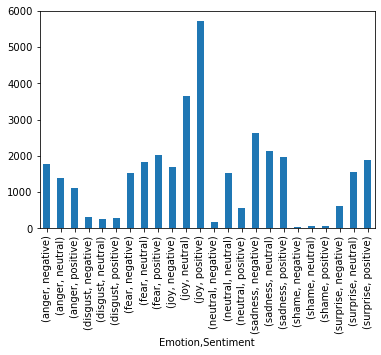

In [33]:
#Differentiate using matplotlib
#first Method
df.groupby(['Emotion','Sentiment']).size().plot(kind='bar')

In [34]:
#USING SEABON
sns.factorplot
sns.catplot

<function seaborn.categorical.catplot(*, x=None, y=None, hue=None, data=None, row=None, col=None, col_wrap=None, estimator=<function mean at 0x000002E4D3A1B280>, ci=95, n_boot=1000, units=None, seed=None, order=None, hue_order=None, row_order=None, col_order=None, kind='strip', height=5, aspect=1, orient=None, color=None, palette=None, legend=True, legend_out=True, sharex=True, sharey=True, margin_titles=False, facet_kws=None, **kwargs)>

C:\ProgramData\Anaconda3\python\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\python\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


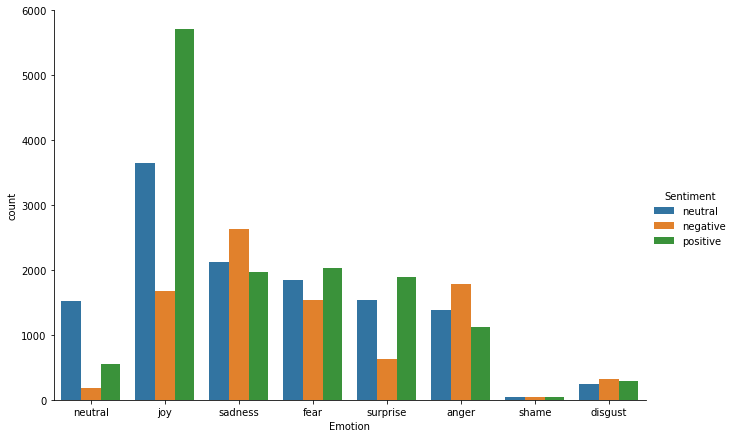

In [35]:
sns.factorplot(x='Emotion',hue='Sentiment',data=df,kind='count',size=6,aspect=1.5)

C:\ProgramData\Anaconda3\python\lib\site-packages\seaborn\categorical.py:3737: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


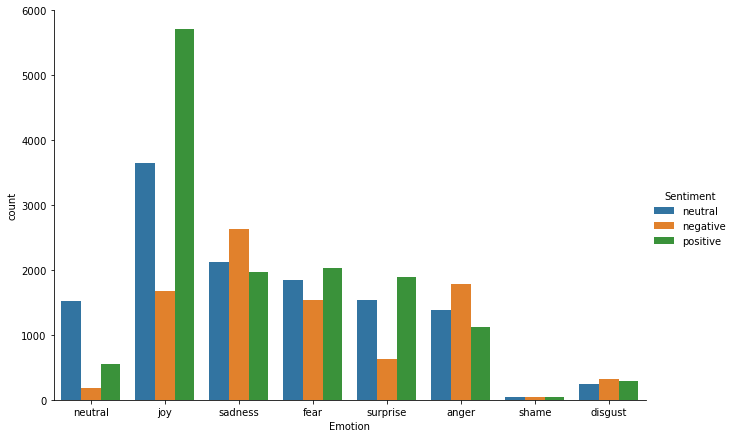

In [36]:
sns.catplot(x='Emotion',hue='Sentiment',data=df,kind='count',size=6,aspect=1.5)

# Text Cleaning

+ Remove Noise
   + stopwords
    + Special characters
    + punctuations
    + emojis

In [37]:
#neattext keys
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [38]:
df['Text']

0                                                   Why ? 
1          Sage Act upgrade on my to do list for tommorow.
2        ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3         Such an eye ! The true hazel eye-and so brill...
4        @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...
                               ...                        
34787    @MichelGW have you gift! Hope you like it! It'...
34788    The world didnt give it to me..so the world MO...
34789                             A man robbed me today . 
34790    Youu call it JEALOUSY, I call it of #Losing YO...
34791    I think about you baby, and I dream about you ...
Name: Text, Length: 34792, dtype: object

In [39]:
df.head()

,Emotion,Text,Sentiment
0,neutral,Why ?,neutral
1,joy,Sage Act upgrade on my to do list for tommorow.,neutral
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,negative
3,joy,Such an eye ! The true hazel eye-and so brill...,positive
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,neutral


In [40]:
#lets clean this text
df['Clean_Text']=df['Text'].apply(nfx.remove_stopwords)

In [41]:
df['Clean_Text']=df['Clean_Text'].apply(nfx.remove_userhandles)

In [42]:
df['Clean_Text']=df['Clean_Text'].apply(nfx.remove_punctuations)

In [43]:
df[['Text','Clean_Text']]

,Text,Clean_Text
0,Why ?,
1,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...
...,...,...
34787,@MichelGW have you gift! Hope you like it! It'...,gift Hope like it hand wear Itll warm Lol
34788,The world didnt give it to me..so the world MO...,world didnt meso world DEFINITELY cnt away
34789,A man robbed me today .,man robbed today
34790,"Youu call it JEALOUSY, I call it of #Losing YO...",Youu JEALOUSY #Losing YOU


# Keywords Exctraction
+ Extract most commonest words per class of emotion

In [44]:
from collections import Counter

In [45]:
# list of emotions
emotion_list=df['Emotion'].unique().tolist()

In [46]:
emotion_list

['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame', 'disgust']

In [47]:
joy_list=df[df['Emotion']=='joy']['Clean_Text'].tolist()

In [48]:
#joy documnet
joy_docx=' '.join(joy_list)

In [49]:
joy_docx

'Sage Act upgrade list tommorow eye  true hazel eyeand brilliant  Regular features  open countenance  complexion  Oh  bloom health  pretty height size  firm upright figure  health  merely bloom  air  head  glance  hears child  picture health    gives idea complete picture grownup health  loveliness    ugh babe hugggzzz u  babe naamazed nga ako e babe e despite negas mas pinaramdam fil ko ang life  Leopold truly happy : hopes prayers beloved son come fruition  feeling fail french #fuckfrench GoodLet   fell love \\X\\ Overnight felt confidence selfesteem responsible worthwhile terribly ecstatic dangerous thing  selected study university Yeah  ’ ages   passed BA exams class results heard selected fot year university Zambia form Chikola secondary school Welp time study days Heading campus rain grad photos feeling awesome    brings  Ive bought Christmas presents trawl loads shops :) shit pants Pure 100% gravy life  Leopold truly happy : hopes prayers beloved son come fruition  Class jamming

In [50]:
def extract_keywords(text,num=50):
    tokens=[tok for tok in text.split()]
    most_common_tokens=Counter(tokens).most_common(num)
    return dict(most_common_tokens)

In [51]:
#extract keyowrods
keyword_joy=extract_keywords(joy_docx)

In [52]:
keyword_joy

{'day': 729,
 'amp': 678,
 'time': 602,
 'Im': 555,
 'work': 509,
 'like': 476,
 'today': 471,
 'tomorrow': 467,
 'Christmas': 453,
 'love': 393,
 'happy': 368,
 'good': 345,
 'night': 332,
 'got': 328,
 ':)': 311,
 'going': 304,
 'home': 302,
 'school': 297,
 'morning': 288,
 '2': 262,
 'joy': 257,
 'life': 251,
 'hours': 251,
 'week': 231,
 'feel': 227,
 'year': 225,
 'days': 208,
 'tonight': 205,
 'long': 204,
 'people': 201,
 'me': 196,
 'great': 194,
 'sleep': 185,
 'new': 181,
 'family': 181,
 's': 180,
 'God': 177,
 'know': 177,
 'hour': 172,
 'friend': 169,
 'felt': 167,
 'cant': 165,
 'it': 162,
 'feeling': 159,
 'RT': 159,
 'friends': 155,
 'think': 148,
 'excited': 145,
 'right': 142,
 'class': 141}

In [53]:
#lets plot this into graph
def plot_most_common_words(mydict,emotion_name):
    df_01=pd.DataFrame(mydict.items(),columns=['token','count'])
    plt.figure(figsize=(20,10))
    plt.title("Plot of most common words of {}".format(emotion_name))
    sns.barplot(x='token',y='count',data=df_01)
    plt.xticks(rotation=45)
    plt.show()

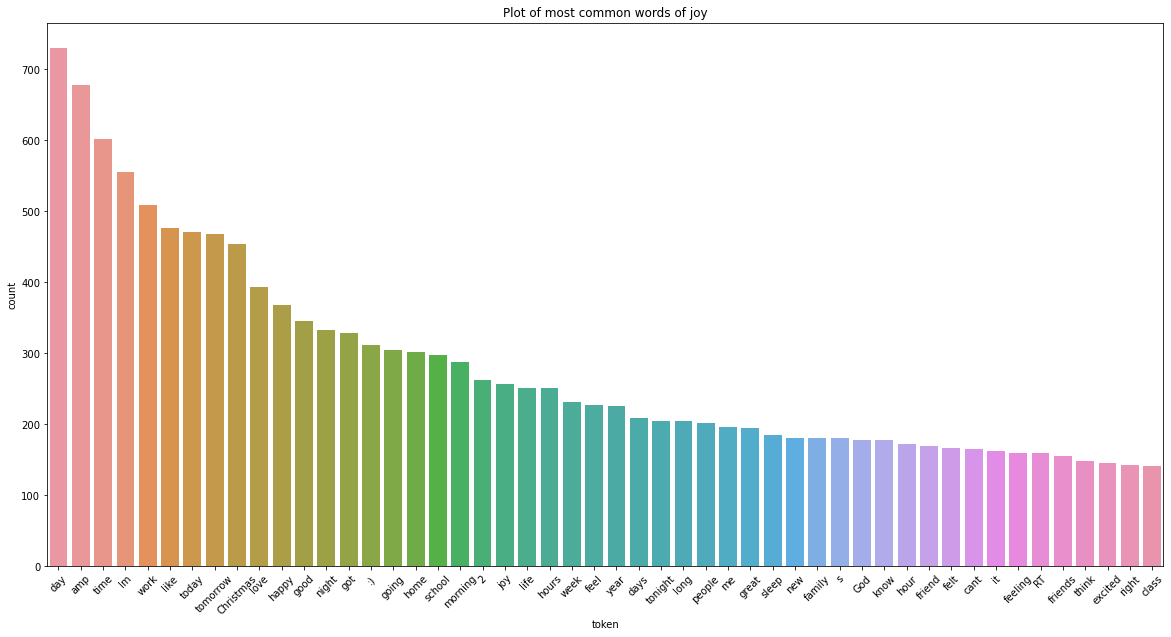

In [54]:
plot_most_common_words(keyword_joy,'joy')

In [57]:
anger_list=df[df['Emotion']=='anger']['Clean_Text'].tolist()
anger_docx=' '.join(anger_list)
anger_docx

'bull tossed effigy hands infuriated    everybody   talk  kill work number slakers wandering around nothing parents allow social function friends attending tried rape best friends claimed fault hassled her claimed loose threatened sue her effect smoking reefer juvenile emotion simple minded creature express Suppressing annoyance called  Little Sara   replied  Sly left feeling absolutely livid  left student newspaper Chinese university table library disappeared came back dipped cotton wool water dabbed livid puffy eyes  soud like neighbours hell  teachers suspicious popularity  annoyed lack interest academic work infuriated achieve high marks examinations  broke artistic work weeks Changes broken permission right this impossible  cheated  disappointed actually consider Taylor Swift role Eponine movie version Les Mis informed flatmate that wed moved flat shed expected buy food separetely  event actually happened 5 months sharing began Prior this said nothing impression arouse anger see a

In [58]:
keyword_anger=extract_keywords(anger_docx)

In [59]:
keyword_anger

{'angry': 305,
 '’': 247,
 'time': 198,
 'friend': 196,
 'anger': 195,
 'people': 179,
 'like': 158,
 's': 158,
 'got': 150,
 'Im': 145,
 'me': 142,
 'said': 130,
 'felt': 130,
 'told': 130,
 'day': 124,
 'work': 121,
 'want': 118,
 'it': 111,
 'know': 105,
 'feel': 101,
 'cant': 98,
 'hate': 93,
 'person': 92,
 'going': 91,
 'mad': 88,
 'home': 86,
 'way': 85,
 'face': 85,
 'mother': 83,
 'things': 83,
 'right': 80,
 'think': 79,
 'good': 77,
 'exasperation': 76,
 'friends': 75,
 'furious': 75,
 'wanted': 75,
 'car': 74,
 'away': 73,
 'went': 73,
 'father': 72,
 'annoyance': 68,
 'resentful': 68,
 'school': 67,
 'thought': 67,
 'night': 65,
 'indignant': 65,
 'brother': 65,
 'asked': 64,
 'man': 64}

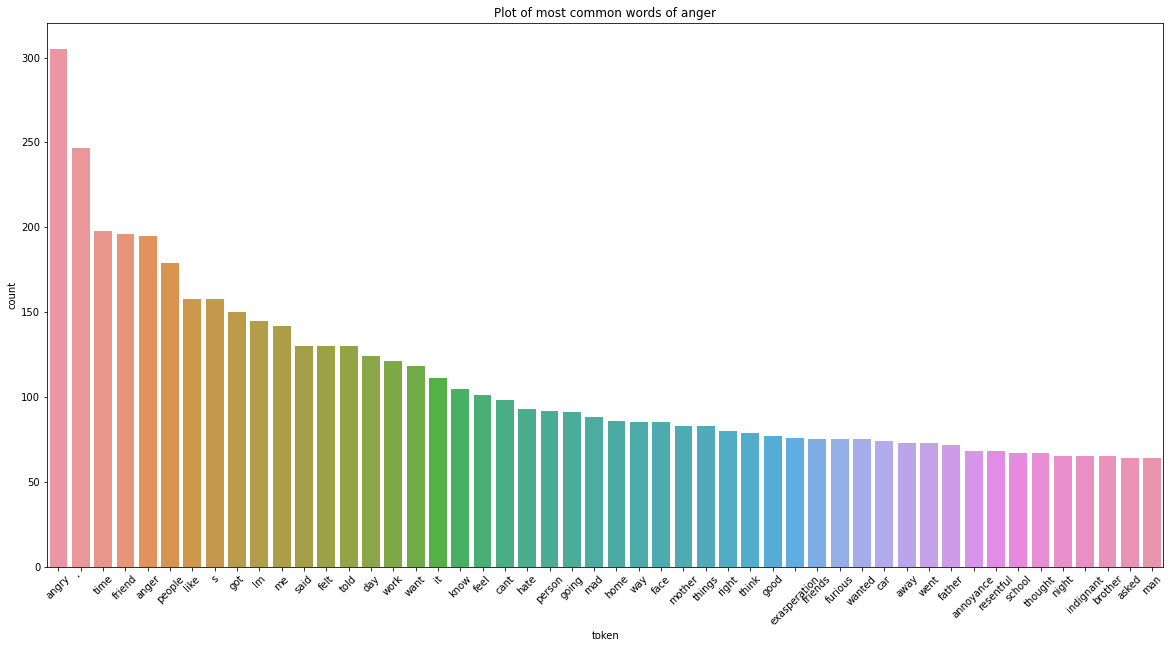

In [60]:
plot_most_common_words(keyword_anger,'anger')

In [61]:
#wordcloud
from wordcloud  import WordCloud

In [62]:
pip install wordcloud

In [63]:
from wordcloud  import WordCloud

In [64]:
def plot_wordcloud(docx):
    mywordcloud=WordCloud().generate(docx)
    plt.figure(figsize=(20,10))
    plt.imshow(mywordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

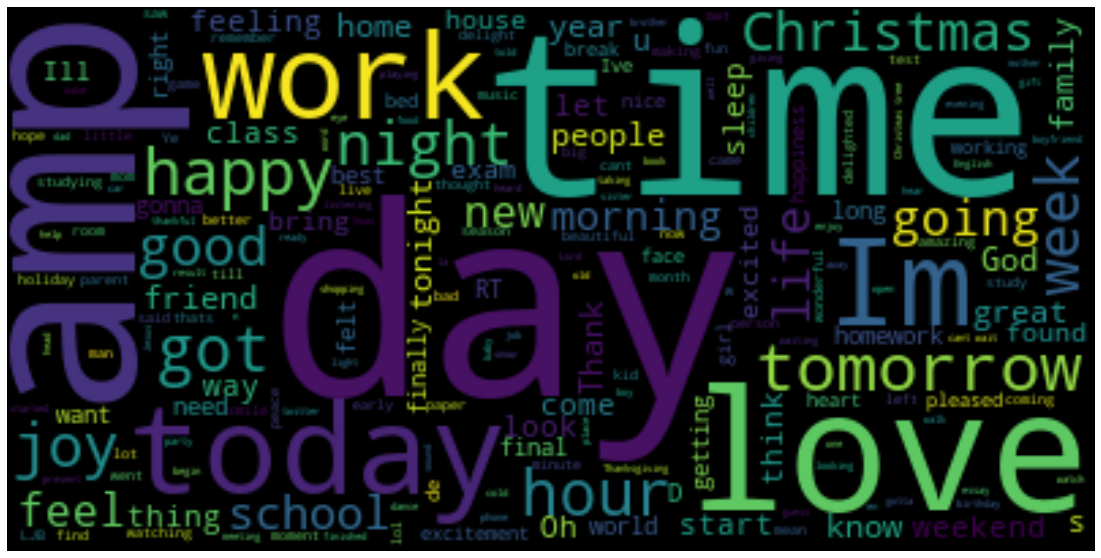

In [65]:
plot_wordcloud(joy_docx)

# Machine Learning
   + naive bayes Theorem
    + Logistic Regression

In [66]:
# Load ML packages
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

In [67]:
#vectorizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [68]:
#metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [69]:
from sklearn.model_selection import train_test_split

##Build features from our text

In [70]:
Xfeatures=df['Clean_Text']
ylabels=df['Emotion']

In [71]:
Xfeatures

0                                                         
1                           Sage Act upgrade list tommorow
2        WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3        eye  true hazel eyeand brilliant  Regular feat...
4          ugh babe hugggzzz u  babe naamazed nga ako e...
                               ...                        
34787           gift Hope like it hand wear  Itll warm Lol
34788           world didnt meso world DEFINITELY cnt away
34789                                    man robbed today 
34790                            Youu JEALOUSY #Losing YOU
34791                                think baby dream time
Name: Clean_Text, Length: 34792, dtype: object

In [72]:
#vectorizer
cv=CountVectorizer()
X=cv.fit_transform(Xfeatures)

In [73]:
#get feature by name
cv.get_feature_names()

['00',
 '000',
 '000ème',
 '0021',
 '00am',
 '00pm',
 '01',
 '0235299130',
 '0330',
 '0400',
 '045',
 '05',
 '0512',
 '06',
 '073',
 '0798765',
 '08',
 '0800',
 '09',
 '099b8',
 '0l',
 '0ntworpen',
 '0o',
 '0oquot',
 '0w',
 '10',
 '100',
 '1000',
 '10000',
 '100000',
 '100000yr',
 '10000th',
 '1000gifts',
 '1000s',
 '1000shs',
 '1000th',
 '100s',
 '100th',
 '101',
 '1010',
 '1015',
 '101quot',
 '102',
 '1021',
 '1022',
 '103',
 '1030',
 '1030am',
 '1030pm',
 '10373629',
 '104',
 '1040',
 '105',
 '106',
 '1080',
 '10am',
 '10ans',
 '10h',
 '10hrs',
 '10k',
 '10mins',
 '10pm',
 '10puntos',
 '10ritengono',
 '10th',
 '10x',
 '10year',
 '10years',
 '10yrolds',
 '11',
 '110',
 '1100pm',
 '1104',
 '110km',
 '111',
 '1111ème',
 '112',
 '1130',
 '115',
 '1162',
 '118',
 '11am',
 '11hour',
 '11months',
 '11pm',
 '11yr',
 '12',
 '120',
 '1200',
 '121',
 '12181',
 '122',
 '122511',
 '123',
 '1230',
 '125',
 '1250',
 '12521260',
 '128',
 '128600',
 '1295',
 '12days',
 '12hours',
 '12hr',
 '12hrstwi

In [74]:
# split dataset
X_train,X_test,y_train,y_test=train_test_split(X,ylabels,test_size=0.3,random_state=42)

In [81]:
print(X_test)

  (0, 17753)	1
  (0, 20380)	1
  (0, 6256)	1
  (0, 1528)	1
  (0, 6090)	1
  (1, 22607)	1
  (1, 19991)	1
  (1, 1929)	1
  (1, 5361)	1
  (1, 34008)	1
  (1, 16312)	1
  (2, 19506)	1
  (2, 17941)	1
  (2, 26450)	1
  (2, 16979)	1
  (2, 8991)	1
  (2, 11521)	1
  (2, 28341)	1
  (2, 16925)	1
  (3, 19798)	1
  (3, 13005)	1
  (3, 12834)	1
  (3, 3638)	1
  (3, 15658)	1
  (4, 3815)	1
  :	:
  (10434, 11095)	1
  (10434, 7951)	1
  (10434, 8528)	1
  (10434, 16090)	1
  (10434, 30296)	1
  (10434, 26133)	1
  (10434, 17247)	1
  (10435, 18045)	1
  (10435, 26411)	1
  (10435, 19945)	1
  (10435, 4979)	1
  (10435, 17311)	1
  (10435, 3363)	1
  (10435, 3376)	1
  (10436, 30275)	1
  (10436, 2365)	1
  (10436, 30901)	1
  (10436, 29646)	1
  (10436, 7526)	1
  (10437, 18510)	1
  (10437, 17616)	1
  (10437, 33577)	1
  (10437, 14133)	1
  (10437, 9121)	1
  (10437, 18337)	1


# Build our model

In [82]:
nb_model=MultinomialNB()
nb_model.fit(X_train,y_train)

MultinomialNB()

In [83]:
#Accuracy
# method 1
nb_model.score(X_test,y_test)

0.5642843456600881

In [84]:
y_pred_for_nb=nb_model.predict(X_test)

In [85]:
y_pred_for_nb

array(['fear', 'sadness', 'sadness', ..., 'sadness', 'anger', 'sadness'],
      dtype='<U8')

In [86]:
np.max(nb_model.predict_proba(X))

1.0

# Make a single prediction
 + Vectorized our text
    + Applied our model

In [87]:
sample_text=[" I love coding so much"]

In [88]:
vect=cv.transform(sample_text).toarray()

In [89]:
# make a prediction

nb_model.predict(vect)

array(['joy'], dtype='<U8')

In [90]:
nb_model.predict_proba(vect)

array([[7.71887420e-03, 4.32378488e-04, 6.13255211e-02, 6.78601776e-01,
        1.91245761e-04, 2.40467259e-01, 1.63388024e-06, 1.12613108e-02]])

In [91]:
# Get all class for our model
nb_model.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype='<U8')

In [92]:
np.max(nb_model.predict_proba(vect))

0.6786017763391645

In [93]:
def predict_emotion(sample_text,model):
    myvect=cv.transform(sample_text).toarray()
    prediction=model.predict(myvect)
    pred_proba=model.predict_proba(myvect)
    pred_percentage_for_all=dict(zip(model.classes_,pred_proba[0]))
    print("Prediction:{}, Prediction Score:{}".format(prediction[0],np.max(pred_proba)))
    return pred_percentage_for_all


In [94]:
predict_emotion(["I love coding so much"],nb_model)

Prediction:joy, Prediction Score:0.6786017763391645


{'anger': 0.007718874198816172,
 'disgust': 0.0004323784877583124,
 'fear': 0.06132552108584217,
 'joy': 0.6786017763391645,
 'neutral': 0.00019124576121008267,
 'sadness': 0.24046725945228875,
 'shame': 1.6338802443624819e-06,
 'surprise': 0.011261310794677947}

In [95]:
nb_model.predict_proba(X)

array([[1.23757904e-01, 2.31584134e-02, 1.54594728e-01, ...,
        1.93274205e-01, 4.51671183e-03, 1.18296789e-01],
       [8.89212242e-03, 9.82001291e-04, 6.30917582e-03, ...,
        1.76296406e-02, 2.13946821e-04, 1.32117166e-02],
       [1.69057133e-02, 7.44275871e-05, 2.34934684e-03, ...,
        9.20992268e-01, 1.39236217e-08, 3.81062355e-04],
       ...,
       [5.01080826e-02, 5.82242688e-04, 5.65241865e-01, ...,
        2.57018107e-01, 2.14975022e-06, 1.93458517e-02],
       [3.07584442e-01, 1.09473209e-03, 2.90697448e-01, ...,
        3.78736956e-01, 2.93336369e-05, 3.24248287e-03],
       [6.52227730e-03, 5.70041072e-05, 9.68656551e-02, ...,
        3.06829774e-01, 6.17714776e-08, 1.63532621e-02]])

In [96]:
predict_emotion(["He hates running all day"],nb_model)

Prediction:joy, Prediction Score:0.9089665715897578


{'anger': 0.010366933571529213,
 'disgust': 0.0003195563339480684,
 'fear': 0.009997815369441347,
 'joy': 0.9089665715897578,
 'neutral': 5.800043787193291e-05,
 'sadness': 0.047719525231977804,
 'shame': 4.351322032698918e-07,
 'surprise': 0.022571162333268505}

# Model Evaluation

In [97]:
print(classification_report(y_test,y_pred_for_nb))

              precision    recall  f1-score   support

       anger       0.64      0.49      0.56      1283
     disgust       0.53      0.03      0.06       292
        fear       0.75      0.60      0.67      1645
         joy       0.51      0.86      0.64      3311
     neutral       0.30      0.02      0.04       675
     sadness       0.56      0.54      0.55      2015
       shame       1.00      0.03      0.05        36
    surprise       0.61      0.27      0.38      1181

    accuracy                           0.56     10438
   macro avg       0.61      0.36      0.37     10438
weighted avg       0.57      0.56      0.53     10438



In [98]:
# confusion matrix
confusion_matrix(y_test,y_pred_for_nb)

array([[ 633,    0,   58,  373,    7,  199,    0,   13],
       [  31,   10,   25,  132,    2,   81,    0,   11],
       [  79,    2,  984,  353,    4,  160,    0,   63],
       [  76,    1,  100, 2848,    9,  204,    0,   73],
       [  20,    0,   17,  550,   14,   71,    0,    3],
       [  89,    1,   74,  726,    7, 1080,    0,   38],
       [   9,    0,    7,   13,    0,    5,    1,    1],
       [  49,    5,   47,  621,    4,  135,    0,  320]], dtype=int64)

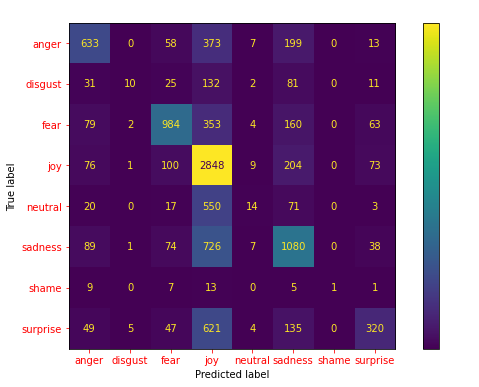

In [99]:
#plot the confusion matrix
#plt.figure(figsize =(5, 4)) 
c_m=plot_confusion_matrix(nb_model,X_test,y_test)
c_m.ax_.set_title('confusion Matrix',color='white')
#plt.xlabel('predicted label',color='white')
plt.gcf().axes[0].tick_params(colors='red')
plt.gcf().axes[1].tick_params(colors='white')
plt.gcf().set_size_inches(10,6)

# Compare with another machine learning model

In [100]:
#logistic regression
lr_model=LogisticRegression()
lr_model.fit(X_train,y_train)

C:\ProgramData\Anaconda3\python\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [101]:
#Accuracy
lr_model.score(X_test,y_test)

0.622341444721211

In [102]:
y_pred_for_lr=predict_emotion(sample_text,lr_model)

Prediction:joy, Prediction Score:0.690639899196589


In [103]:
y_pred_for_lr=lr_model.predict(X_test)

In [104]:
confusion_matrix(y_test,y_pred_for_lr)

array([[ 709,    9,   66,  227,   80,  149,    1,   42],
       [  40,   50,   26,   86,    7,   56,    1,   26],
       [  80,    5, 1068,  236,   39,  143,    0,   74],
       [ 114,    6,  127, 2500,  117,  265,    1,  181],
       [  13,    1,   10,   94,  491,   56,    0,   10],
       [ 124,    8,   97,  471,   68, 1151,    1,   95],
       [   0,    0,    1,    6,    1,    2,   26,    0],
       [  52,    6,   45,  403,   28,  145,    1,  501]], dtype=int64)

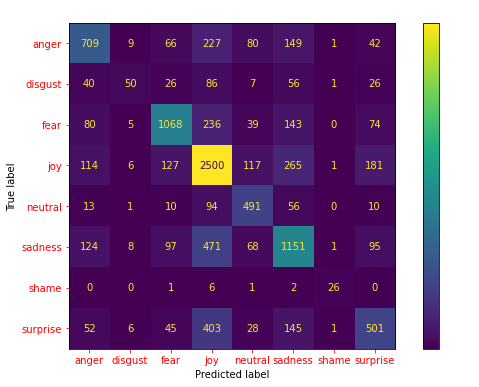

In [105]:
#plot the confusion matrix
#plt.figure(figsize =(5, 4)) 
c_m=plot_confusion_matrix(lr_model,X_test,y_test)
c_m.ax_.set_title('confusion Matrix',color='white')
#plt.xlabel('predicted label',color='white')
plt.gcf().axes[0].tick_params(colors='red')
plt.gcf().axes[1].tick_params(colors='white')
plt.gcf().set_size_inches(10,6)

In [106]:
print(classification_report(y_test,y_pred_for_lr))

              precision    recall  f1-score   support

       anger       0.63      0.55      0.59      1283
     disgust       0.59      0.17      0.27       292
        fear       0.74      0.65      0.69      1645
         joy       0.62      0.76      0.68      3311
     neutral       0.59      0.73      0.65       675
     sadness       0.59      0.57      0.58      2015
       shame       0.84      0.72      0.78        36
    surprise       0.54      0.42      0.47      1181

    accuracy                           0.62     10438
   macro avg       0.64      0.57      0.59     10438
weighted avg       0.62      0.62      0.62     10438



# Model Interpretation
 Eli5
 Lime
 Shap

In [99]:
#Interpret the model
! pip install eli5

In [101]:
#show the weights of each class
import eli5
eli5.show_weights(lr_model,top=20)

In [100]:
class_names=ylabels.unique().tolist()
print(class_names)

['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame', 'disgust']


In [101]:
feature_names=cv.get_feature_names()
print(feature_names)

['00', '000', '000ème', '0021', '00am', '00pm', '01', '0235299130', '0330', '0400', '045', '05', '0512', '06', '073', '0798765', '08', '0800', '09', '099b8', '0l', '0ntworpen', '0o', '0oquot', '0w', '10', '100', '1000', '10000', '100000', '100000yr', '10000th', '1000gifts', '1000s', '1000shs', '1000th', '100s', '100th', '101', '1010', '1015', '101quot', '102', '1021', '1022', '103', '1030', '1030am', '1030pm', '10373629', '104', '1040', '105', '106', '1080', '10am', '10ans', '10h', '10hrs', '10k', '10mins', '10pm', '10puntos', '10ritengono', '10th', '10x', '10year', '10years', '10yrolds', '11', '110', '1100pm', '1104', '110km', '111', '1111ème', '112', '1130', '115', '1162', '118', '11am', '11hour', '11months', '11pm', '11yr', '12', '120', '1200', '121', '12181', '122', '122511', '123', '1230', '125', '1250', '12521260', '128', '128600', '1295', '12days', '12hours', '12hr', '12hrstwitter', '12km', '12th', '12xbuild', '12xsmile', '12yearold', '13', '130', '1300', '130am', '135', '135quo

In [104]:
eli5.show_weights(lr_model,feature_names=feature_names,target_names=class_names)